# **TensorFlow WebDesign em Foco**

## *Importação*

In [1]:
# Lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import load_model
from IPython.display import Image
%matplotlib inline

### *Criando uma Sessão*

In [2]:
# Sessão
with tf.compat.v1.Session() as sess:
    frase = tf.constant("Olá Mundo!")
    rodar = sess.run(frase)
print(rodar)

b'Ol\xc3\xa1 Mundo!'


In [3]:
# Outra forma
tf.compat.v1.disable_eager_execution()
frase = tf.constant("Hello World")
sess = tf.compat.v1.Session()
rodar = sess.run(frase)
sess.close()
print(rodar)

b'Hello World'


### *Grafo Computacional*

In [4]:
# Visualizando o grafo
tf.compat.v1.disable_eager_execution()
num1 = tf.constant(5)
num2 = tf.constant(2)

with tf.compat.v1.Session() as sess:
    soma = tf.math.add(num1, num2)
    write = tf.compat.v1.summary.FileWriter('C:/Labs/TensorFlow/plot', sess.graph)
    saida = sess.run(soma)

### *Keras - Classificação de Imagens*

#### Dados

In [5]:
# mportando o Data Frame de imagens
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
# As classes de roupas
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

### *Normalização dos Dados de Imagens*

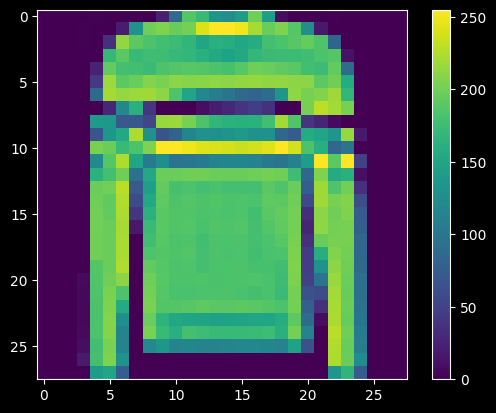

In [7]:
# Normalizando e visualizando
plt.figure()
plt.imshow(X_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

X_train = X_train / 255.0
X_test = X_test / 255.0

### *Criando o modelo*

In [8]:
# Modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
# Compilando o modelo
model.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
# Treinando o modelo
model.fit(X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4996 - accuracy: 0.8253
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3765 - accuracy: 0.8627
Epoch 3/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3395 - accuracy: 0.8764
Epoch 4/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3139 - accuracy: 0.8851
Epoch 5/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2955 - accuracy: 0.8914
Epoch 6/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2834 - accuracy: 0.8939
Epoch 7/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2694 - accuracy: 0.9008
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2576 - accuracy: 0.9039
Epoch 9/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2479 - accuracy: 0.9077
Epoch 10/10
60

### *Predições*

In [11]:
# Predição
pred = model.predict(X_test)
pred[19]

c:\Labs\venv\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([9.4908112e-01, 5.8435393e-07, 2.1728484e-03, 1.7587405e-02,
       3.4103276e-05, 3.7406780e-09, 3.1123985e-02, 8.0757019e-15,
       1.0551681e-07, 6.0251893e-14], dtype=float32)

In [12]:
# Valor máximo
np.argmax(pred[19])

0

In [13]:
# Visualizando o y de Teste
y_test[19]

0